# Lab8: Data Encoding

#### Name: Jorge González Cardelús
#### Group: 1º B - GITT
#### Date: 11/11/2019

### Lab 8.2: Read CSV files

In [1]:
weather_file = open("weather.csv", 'r')
weather_data = weather_file.readlines()

days = []
t_min = []
t_max = []

for i in range(1,len(weather_data)):
    raw_info = weather_data[i].split(',')
    days.append(raw_info[0])
    t_min.append(int(raw_info[1]))
    t_max.append(int(raw_info[2]))

weather_file.close()

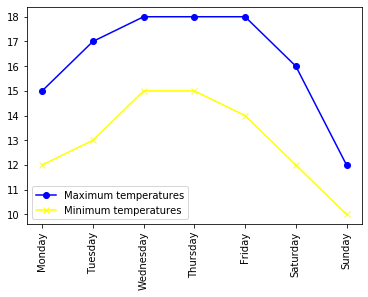

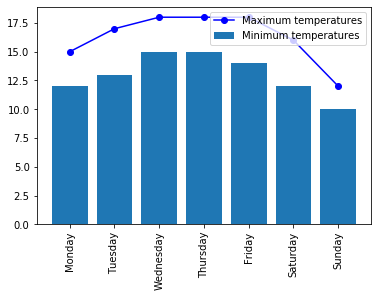

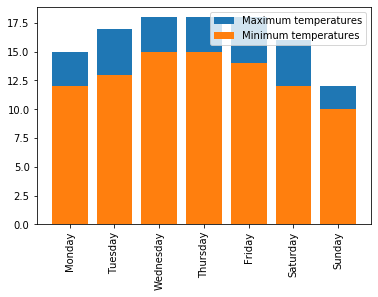

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xticks(range(7),days,rotation='vertical')
plt.plot(t_max, color="blue", marker='o', label="Maximum temperatures")
plt.plot(t_min, color="yellow", marker='x', label="Minimum temperatures")
plt.legend()
plt.show()

plt.xticks(range(7),days,rotation='vertical')
plt.plot(t_max, color="blue", marker='o', label="Maximum temperatures")
plt.bar(days, height=t_min, width=0.8, bottom=None, label="Minimum temperatures")
plt.legend()
plt.show()

plt.xticks(range(7),days,rotation='vertical')
plt.bar(days, height=t_max, width=0.8, bottom=None, label="Maximum temperatures")
plt.bar(days, height=t_min, width=0.8, bottom=None, label="Minimum temperatures")
plt.legend()
plt.show()

### Lab 8.3: Read XLS files

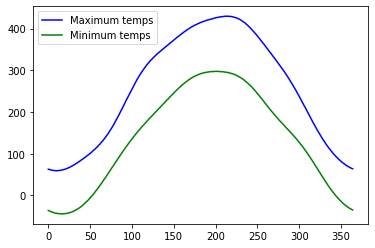

In [3]:
## LAB 8.3
import pandas as pd

def temp_to_c(temps_f):
    temps = []
    for temp_f in temps_f:
        temp_c = (temp_f - 32)/1.8
        temps.append(temp_c)
    return temps

nd_data = pd.read_excel('North_Dakota.xlsx')

t_min_f = nd_data["DLY-TMIN-NORMAL"]
t_max_f = nd_data["DLY-TMAX-NORMAL"]

t_min  = temp_to_c(t_min_f)
t_max = temp_to_c(t_max_f)


plt.plot(t_max, color="blue", label="Maximum temps")
plt.plot(t_min, color="green", label="Minimum temps")
plt.legend()
plt.show()

### Lab 8.4 Word with API REST

    class Game_Stats

It is an object that saves and handles the game statistics, therefore, each turn it updates the information. It also has a function named

    def show(self):

which calculates the statistics and the displays it.

The functions

    def get_difficulty()
    def get_category()
    def get_amount()

Get the parameters of the game and handle any errors in the response. 

    def get_api_url()

Calls these methods and builds the api url with the responses.

    def get_questions()

This functions calls  "get_api_url" , then requests the url and parses it into a JSON which returns as a variable.

When a new game is started, "get_questions" is called. The json dictionary is passed to "start_game" which iterates through each question. The questions are handled by 


    def ask_question()
    def ask_solution()


The first one parses the JSON and formats the question and the second one, prints the choices, times the answer and checks if the answer is correct. When all the questions have been asked, the stats are printed.

In [4]:
import requests
import random
import time

class Game_Stats:
    def __init__(self):
        self.correct = 0
        self.incorrect = 0
        self.total_time = 0
        self.answered_questions = 0

    def update(self, is_correct, time):
        self.answered_questions += 1
        self.total_time += time
        if is_correct:
            self.correct += 1
        else:
            self.incorrect += 1

    def show(self):
        print("            ")
        print("*************")
        print("Game stats: ")
        print("Total questions: %s" % (self.answered_questions))
        print("     · Correct questions: %s -- %s" % (str(self.correct), str((self.correct / self.answered_questions) * 100)))
        print("     · Incorrect questions: %s -- %s" % (str(self.incorrect), str((self.incorrect / self.answered_questions) * 100)))
        print("Average response time: %s" % (self.total_time / self.answered_questions))
        print("*************")
        print("            ")

def get_amount():
    amount = 0
    while True:
        try:
            amount = int(input("Enter the number of questions (1-50): "))

            if amount > 0 and amount < 51:
                break
            else:
                print("The number is out of range")
        except ValueError:
            print("You have to enter a number.")

    return amount

def get_difficulty():
    difficulty = ''
    
    print()
    print("Please select the difficulty: ")
    print("     1 -- Easy")
    print("     2 -- Medium")
    print("     3 -- Hard")
    print("The default answer is 1.")
    print()
    choice = input("      >>> ")

    if choice == '1':
        difficulty = 'easy'
    elif choice == '2':
        difficulty = 'medium'
    elif choice == '3':
        difficulty = 'hard'
    else:
        print("The value entered is not correct. Selected the default option.")
        difficulty = 'easy'

    return difficulty

def get_category():
    category = None
    print()
    print("Please select the difficulty: ")
    print("     1 -- Any category")
    print("     2 -- General knowledge")
    print("     3 -- Politics")
    print("     4 -- Science: Computers")
    print("     5 -- Science: Mathematics")
    print("     6 -- History")
    print("The default answer is 1.")
    print()
    choice = input("      >>> ")

    if choice == '2':
        category = 9
    elif choice == '3':
        category = 24
    elif choice == '4':
        category = 18
    elif choice == '5':
        category = 19
    elif choice == '6':
        category = 23

    return category

def get_api_url():
    api_url = "https://opentdb.com/api.php"

    amount = get_amount()
    difficulty = get_difficulty()
    category = get_category()

    # Params = ?amount=10&difficulty=medium&type=multiple&category
    params = '?amount=' + str(amount)
    params += '&type=multiple'
    params += '&difficulty=' + difficulty
    if category != None:
        params += '&category=' + str(category)

    api_url += params

    return api_url

def get_questions():
    api_url = get_api_url()
    response = requests.get(api_url)
    response.encoding = 'utf-8'
    data = response.json()
    
    return data

def ask_solution(correct, answers):
    answer_time = 0
    is_correct = False
    while True:
        start_time = time.time()
        for i, answer in enumerate(answers):
            print("     %s) %s" % ((i + 1), answer))
        print()
        try:
            choice = int(input("       >>> "))

            if choice > len(answers) or choice < 1:
                print("Please enter a number between 1 and %s" % (len(answers)))
            else:
                answer_time = time.time() - start_time
                index = choice - 1
                if correct == answers[index]:
                    is_correct = True

                break
        except ValueError:
            print("Please enter a number between 1 and %s" % (len(answers)))

    
    return is_correct, answer_time 

def ask_question(question_data, game_stats):
    category = question_data["category"]
    question = question_data["question"]
    correct_answer = question_data["correct_answer"]
    answers = question_data["incorrect_answers"]

    answers.append(correct_answer)
    random.shuffle(answers)

    print()
    print(question)
    print('     -- %s' % (category))
    print()
    is_correct, time = ask_solution(correct_answer, answers)

    game_stats.update(is_correct, time)

    return is_correct
    

def start_game(data):
    questions = data["results"]
    game_stats = Game_Stats()

    for question_data in questions:
        is_correct = ask_question(question_data, game_stats)

    game_stats.show()
    
    request = input("Do you want to play again? [N/y]: ")
    if request == "y":
        new_game()
    else: 
        print("Thank you for playing")


def new_game():
    data = get_questions()
    start_game(data)

In [5]:
new_game()

Enter the number of questions (1-50): 10

Please select the difficulty: 
     1 -- Easy
     2 -- Medium
     3 -- Hard
The default answer is 1.

      >>> 
The value entered is not correct. Selected the default option.

Please select the difficulty: 
     1 -- Any category
     2 -- General knowledge
     3 -- Politics
     4 -- Science: Computers
     5 -- Science: Mathematics
     6 -- History
The default answer is 1.

      >>> 

The body of the Egyptian Sphinx was based on which animal?
     -- Geography

     1) Lion
     2) Bull
     3) Dog
     4) Horse

       >>> 4

According to the International System of Units, how many bytes are in a kilobyte of RAM?
     -- Science: Computers

     1) 1000
     2) 512
     3) 500
     4) 1024

       >>> 4

Who is the creator of the comic series &quot;The Walking Dead&quot;?
     -- Entertainment: Comics

     1) Stan Lee
     2) Malcolm Wheeler-Nicholson
     3) Robert Kirkman
     4) Robert Crumb

       >>> 3

What is Gabe Newell&#039;